In [1]:
import sys,os
sys.path.append("/nlp/scr/zyanzhe/Pix2Code")

from Pix2Code.metrics.visual_score import visual_eval_v3, visual_eval_v3_multi
from tqdm import tqdm
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def show_images_side_by_side(image_file_lst, border_color='black', border_width=0.05):
    n_images = len(image_file_lst)
    # Read the images
    images = [cv2.imread(image_file) for image_file in image_file_lst]

    # Set up the figure and subplots
    plt.figure(figsize=(40, 10))  # Adjusted the size to accommodate four images

    # Adjust subplot parameters to create space (border) between images
    plt.subplots_adjust(wspace=border_width)

    for i in range(n_images):
        plt.subplot(1, n_images, i+1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.axis('off')

    # Set the background color of the figure (acts as border color)
    plt.gcf().set_facecolor(border_color)

    # Display the images
    plt.show()

In [3]:
reference_dir = "../../testset_100"
websight_predictions_dir = "../../predictions_100/websight"
direct_prompting_predictions_dir = "../../predictions_100/gpt4v_direct_prompting"
text_augmented_prompting_predictions_dir = "../../predictions_100/gpt4v_text_augmented_prompting"
revision_prompting_predictions_dir = "../../predictions_100/gpt4v_visual_revision_prompting"
layout_marker_predictions_dir = "../../predictions_100/gpt4v_layout_marker_prompting"

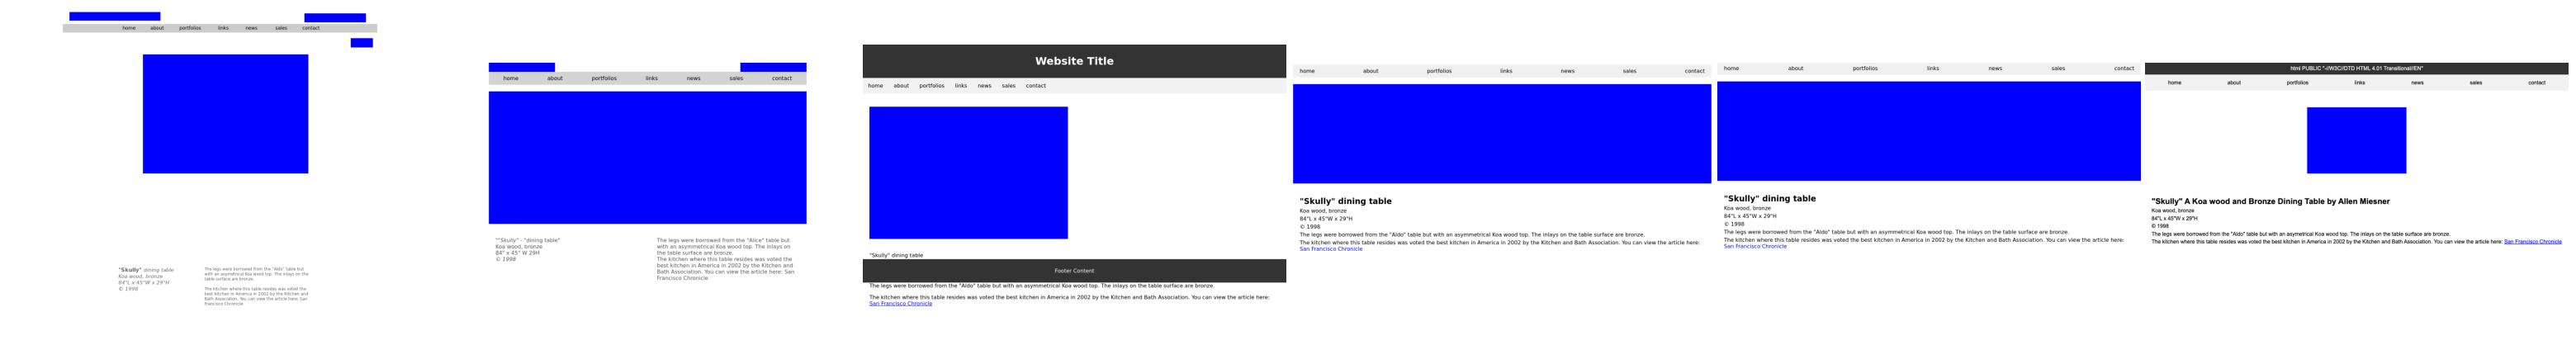

In [4]:
show_images_side_by_side((os.path.join(reference_dir, "2.png"), os.path.join(websight_predictions_dir, "2.png"), os.path.join(direct_prompting_predictions_dir, "2.png"), os.path.join(text_augmented_prompting_predictions_dir, "2.png"), os.path.join(revision_prompting_predictions_dir, "2.png"), os.path.join(layout_marker_predictions_dir, "2.png")), border_color='white', border_width=0.01)

In [ ]:
def print_multi_score(multi_score):
    final_size_score, final_matched_text_score, final_position_score, final_text_color_score, final_clip_score = multi_score
    print()
    print("final_size_score", final_size_score)
    print("Matched Text Score", final_matched_text_score)
    print("Position Score", final_position_score)
    print("Text Color Score", final_text_color_score)
    print("CLIP Score", final_clip_score)
    print("--------------------------------\n")

import random 
random.seed(2024)
all_files = [item for item in os.listdir(websight_predictions_dir) if item.endswith(".html")]
random.shuffle(all_files)
for filename in tqdm(all_files[:5]):
    print(filename)

    ## websight score 
    matched, final_score, multi_score = visual_eval_v3(os.path.join(websight_predictions_dir, filename.replace(".html", ".png")), os.path.join(reference_dir, filename.replace(".html", ".png")))
    print ("websight score: ", final_score)
    print_multi_score(multi_score)
    
    ## direct prompting score 
    matched, final_score, multi_score = visual_eval_v3(os.path.join(direct_prompting_predictions_dir, filename.replace(".html", ".png")), os.path.join(reference_dir, filename.replace(".html", ".png")))
    print ("direct prompting score: ", final_score)
    print_multi_score(multi_score)

    ## text augmented prompting score
    macthed, final_score, multi_score = visual_eval_v3(os.path.join(text_augmented_prompting_predictions_dir, filename.replace(".html", ".png")), os.path.join(reference_dir, filename.replace(".html", ".png")))
    print ("text augmented prompting score: ", final_score)
    print_multi_score(multi_score)

    ## revision prompting score
    macthed, final_score, multi_score = visual_eval_v3(os.path.join(revision_prompting_predictions_dir, filename.replace(".html", ".png")), os.path.join(reference_dir, filename.replace(".html", ".png")))
    print ("revision prompting score: ", final_score)
    print_multi_score(multi_score)

    ## layout marker score
    macthed, final_score, multi_score = visual_eval_v3(os.path.join(layout_marker_predictions_dir, filename.replace(".html", ".png")), os.path.join(reference_dir, filename.replace(".html", ".png")))
    print ("layout marker score: ", final_score)
    print_multi_score(multi_score)

    show_images_side_by_side((os.path.join(reference_dir, filename.replace(".html", ".png")), os.path.join(websight_predictions_dir, filename.replace(".html", ".png")), os.path.join(direct_prompting_predictions_dir, filename.replace(".html", ".png")), os.path.join(text_augmented_prompting_predictions_dir, filename.replace(".html", ".png")), os.path.join(revision_prompting_predictions_dir, filename.replace(".html", ".png")), os.path.join(layout_marker_predictions_dir, filename.replace(".html", ".png"))), border_color='white', border_width=0.01)

13935.html
[{'text': 'ok', 'bbox': (0.9569230769230769, 0.027914614121510674, 0.013076923076923076, 0.007389162561576354), 'color': (4, 4, 4)}, {'text': 'news', 'bbox': (0.009230769230769232, 0.07307060755336617, 0.03461538461538462, 0.009852216748768473), 'color': (253, 254, 254)}, {'text': 'company', 'bbox': (0.28615384615384615, 0.07307060755336617, 0.05923076923076923, 0.009852216748768473), 'color': (254, 254, 254)}, {'text': 'products', 'bbox': (0.5876923076923077, 0.07307060755336617, 0.06538461538461539, 0.009852216748768473), 'color': (253, 254, 253)}, {'text': 'downloads', 'bbox': (0.8961538461538462, 0.07307060755336617, 0.08, 0.009852216748768473), 'color': (253, 253, 253)}, {'text': 'products', 'bbox': (0.024615384615384615, 0.13628899835796388, 0.06923076923076923, 0.012315270935960592), 'color': (0, 0, 0)}, {'text': 'knee', 'bbox': (0.040769230769230766, 0.16995073891625614, 0.043076923076923075, 0.009852216748768473), 'color': (1, 1, 1)}, {'text': 'kam-titan', 'bbox': (

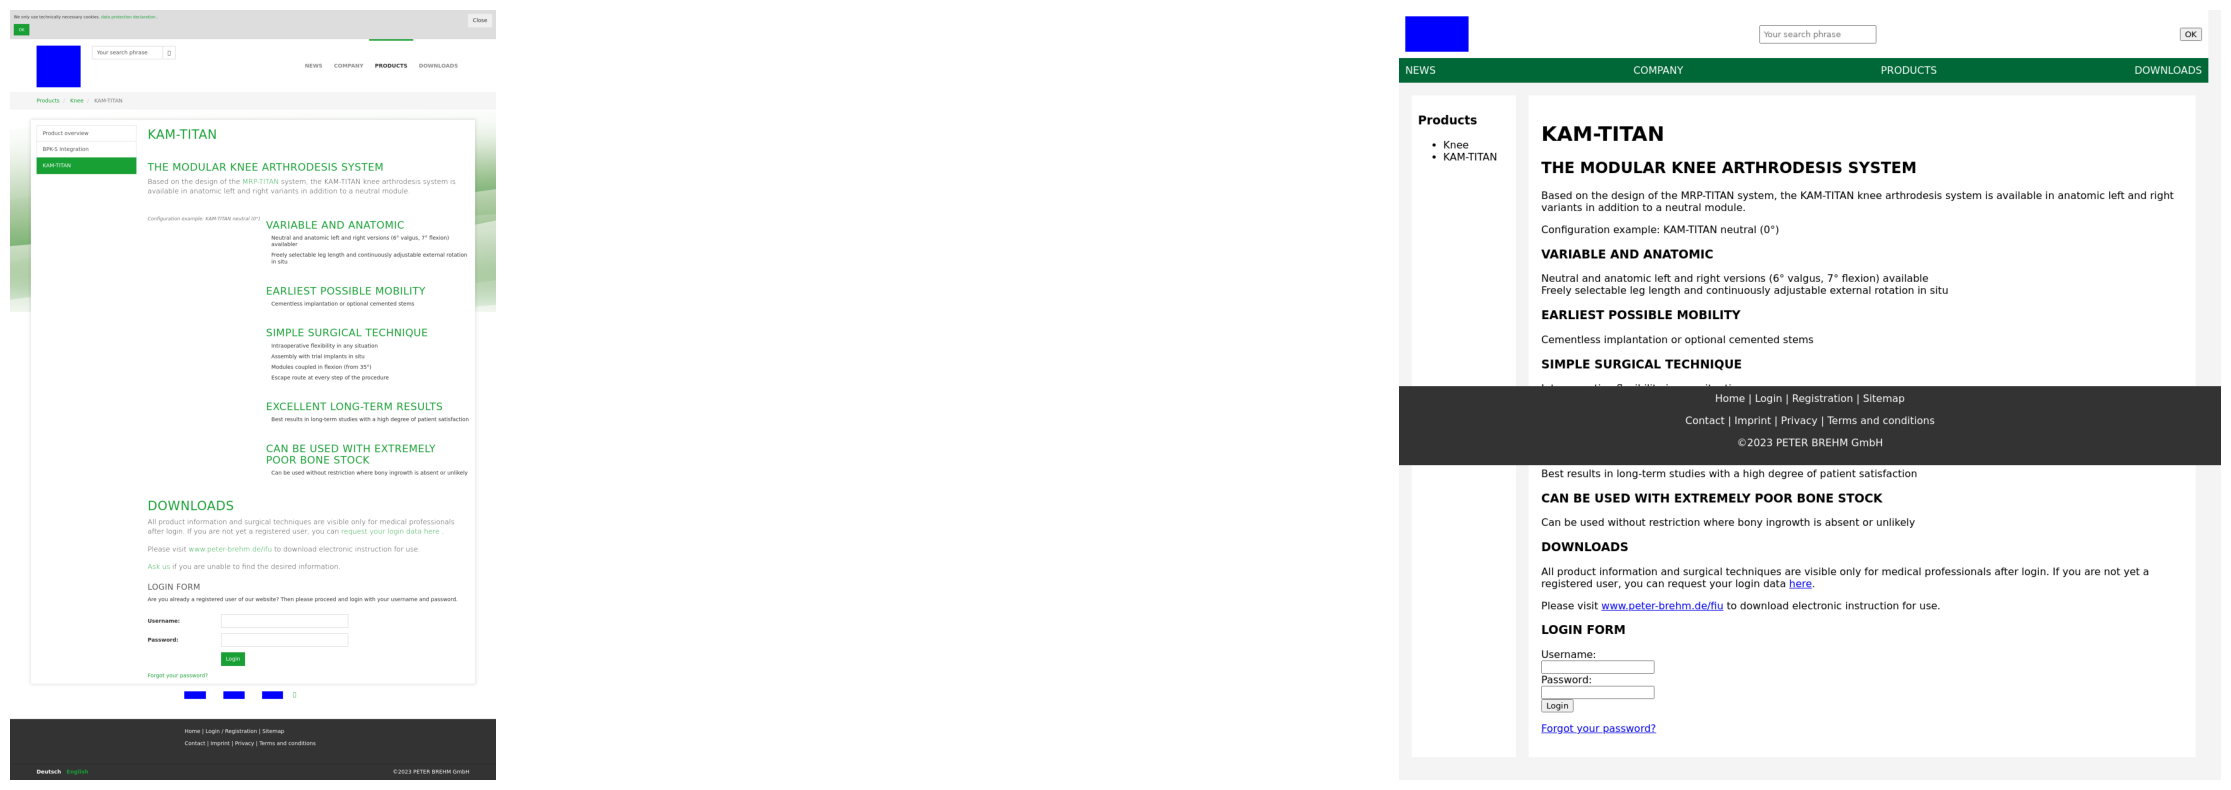

In [5]:
def print_multi_score(multi_score):
    final_size_score, final_matched_text_score, final_position_score, final_text_color_score, final_clip_score = multi_score
    print()
    print("final_size_score", final_size_score)
    print("Matched Text Score", final_matched_text_score)
    print("Position Score", final_position_score)
    print("Text Color Score", final_text_color_score)
    print("CLIP Score", final_clip_score)
    print("--------------------------------\n")

debug = True

reference_dir = "../../testset_100"

"""
test_dirs = {"websight": "../../predictions_100/websight",\
             "direct_prompting": "../../predictions_100/gpt4v_direct_prompting", \
             "text_augmented_prompting": "../../predictions_100/gpt4v_text_augmented_prompting", \
             "revision_prompting": "../../predictions_100/gpt4v_visual_revision_prompting"}
"""

test_dirs = {"direct_prompting": "../../predictions_100/gpt4v_direct_prompting"}

# for filename in ["16635.html", "8512.html", "13775.html"]:
for filename in ["13935.html"]:
    print(filename)

    input_pred_list = [os.path.join(test_dirs[key], filename.replace(".html", ".png")) for key in test_dirs]
    original = os.path.join(reference_dir, filename.replace(".html", ".png"))

    input_list = [input_pred_list, original]

    return_score_list = visual_eval_v3_multi(input_list, debug=debug)
    idx = 0
    for key in test_dirs:
        sum_max_areas, final_score, multi_score = return_score_list[idx]
        idx += 1

        print(f"{key} score: ", final_score)
        print("sum_max_areas: ", sum_max_areas)
        print_multi_score(multi_score)

    show_images_side_by_side([os.path.join(reference_dir, filename.replace(".html", ".png"))] + [os.path.join(test_dirs[key], filename.replace(".html", ".png")) for key in test_dirs], border_color='white', border_width=0.01)

websight score:  0.7811309095186968
sum_max_areas:  0.21639201240123593

final_size_score 0.077248114296098
Matched Text Score 0.050892530231396074
Position Score 0.06635167651990116
Text Color Score 0.06772309699974771
CLIP Score 0.7336742281913757
--------------------------------

direct_prompting score:  0.8673149277335606
sum_max_areas:  0.26376942473187304

final_size_score 0.7268242300262994
Matched Text Score 0.6520998825719849
Position Score 0.5738267448902201
Text Color Score 0.530788213348855
CLIP Score 0.7972003221511841
--------------------------------

text_augmented_prompting score:  0.9218576559955689
sum_max_areas:  0.1676159136748786

final_size_score 0.7904154562560184
Matched Text Score 0.7795769316819514
Position Score 0.6157062738875668
Text Color Score 0.5864980147052893
CLIP Score 0.8581002950668335
--------------------------------

revision_prompting score:  0.9098334950775903
sum_max_areas:  0.1577297313348066

final_size_score 0.7285361485908716
Matched Text S

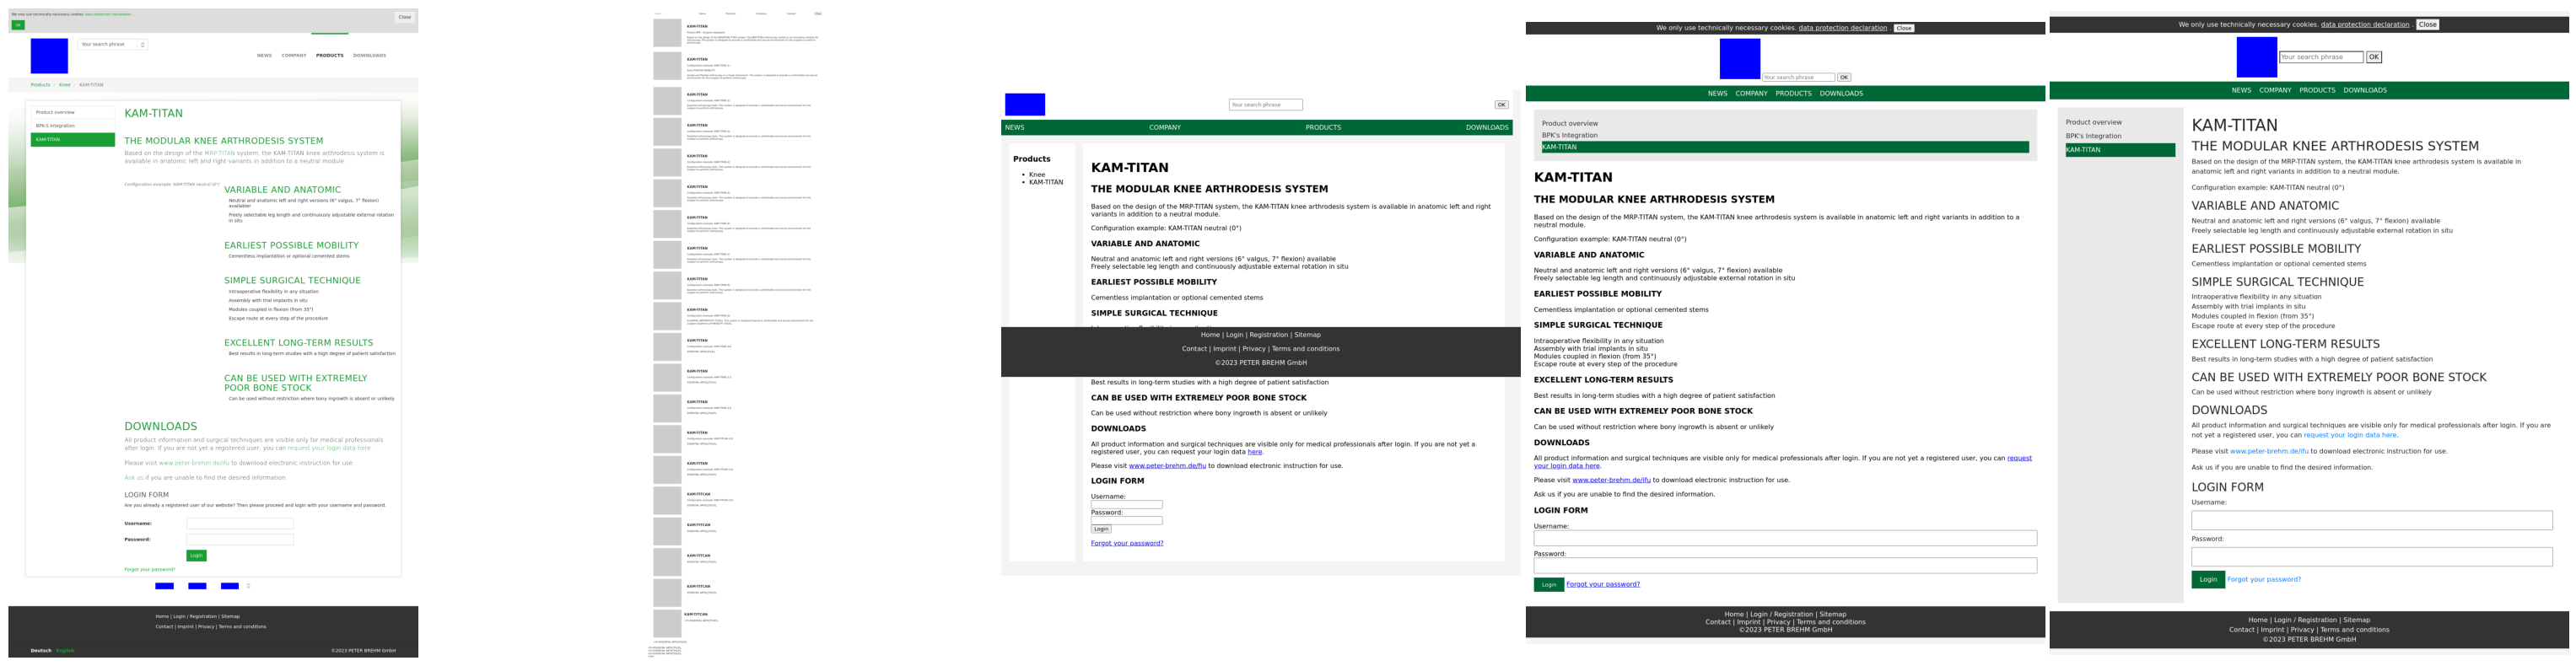

In [8]:
idx = 0
for key in test_dirs:
    sum_max_areas, final_score, multi_score = return_score_list[idx]
    idx += 1

    print(f"{key} score: ", final_score)
    print("sum_max_areas: ", sum_max_areas)
    print_multi_score(multi_score)
    
show_images_side_by_side([os.path.join(reference_dir, filename.replace(".html", ".png"))] + [os.path.join(test_dirs[key], filename.replace(".html", ".png")) for key in test_dirs], border_color='white', border_width=0.01)